# Exploration et test de modèles de prédiction du prix de l'habitation sur le dataset des Demandes de Valeurs Foncières sur le département du Seine et Marne

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

Url du dataset:

- https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1


In [2]:
DVFdf = pd.read_csv(
    "https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1", sep="|")
DVFdf

/var/folders/g9/f6jl27016pl9tw5b9cwt5hfw0000gn/T/ipykernel_27577/3690728460.py:1: DtypeWarning: Columns (18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  DVFdf = pd.read_csv(


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,2.0,Appartement,NaN,233.0,8.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,64.0,3.0,S,NaN,988.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,26/05/2023,Vente,...,NaN,1,2.0,Appartement,NaN,49.0,3.0,NaN,NaN,NaN
1532714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,22/06/2023,Vente,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
1532715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,22/06/2023,Vente,...,NaN,2,2.0,Appartement,NaN,93.0,2.0,NaN,NaN,NaN
1532716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/06/2023,Vente,...,NaN,2,2.0,Appartement,NaN,79.0,4.0,NaN,NaN,NaN


In [3]:
DVFdf["Code postal"] = pd.to_numeric(
    DVFdf["Code postal"], errors="coerce").astype("Int64")
DVFdf["Type local"] = DVFdf["Type local"].astype("category").cat.add_categories(
    "Terrain").fillna("Terrain").astype(str)
DVFdf["Nombre pieces principales"] = pd.to_numeric(
    DVFdf["Nombre pieces principales"], errors="coerce").astype("Int64").fillna(0)
DVFdf["Valeur fonciere"] = pd.to_numeric(
    DVFdf["Valeur fonciere"].str.replace(",", "."), errors="coerce")

In [4]:
DVFdf["Type local"].value_counts(dropna=False)

Type local
Terrain                                     622878
Dépendance                                  403890
Maison                                      242631
Appartement                                 213434
Local industriel. commercial ou assimilé     49885
Name: count, dtype: int64

In [5]:
DVFdf = DVFdf.dropna(subset=['Valeur fonciere']).dropna(how='all', axis=1)

In [6]:
# sns.heatmap(~DVFdf.isnull(), cbar=False)

In [7]:
DVFdf[DVFdf["Code departement"].isin(
    [75, 77, 78, 91, 92, 93, 94, 95])]["Code departement"].value_counts()

Code departement
75    39782
77    31528
92    29952
78    25493
94    22086
91    21489
93    19902
95    19549
Name: count, dtype: int64

In [8]:
seine_et_marneDf = DVFdf[DVFdf["Code departement"] == 77]
seine_et_marneDf["Date mutation"] = pd.to_datetime(
    seine_et_marneDf["Date mutation"], format="%d/%m/%Y")
seine_et_marneDf["new_commune"] = ("77" +
                                   seine_et_marneDf["Code commune"].astype(str).str.zfill(3)).astype("Int64")
seine_et_marneDf["new_commune"]

/var/folders/g9/f6jl27016pl9tw5b9cwt5hfw0000gn/T/ipykernel_27577/4035325055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seine_et_marneDf["Date mutation"] = pd.to_datetime(
/var/folders/g9/f6jl27016pl9tw5b9cwt5hfw0000gn/T/ipykernel_27577/4035325055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seine_et_marneDf["new_commune"] = ("77" +


1131514    77445
1131515    77305
1131516    77305
1131517    77122
1131518    77122
           ...  
1163171    77159
1163172    77078
1163173    77078
1163174    77078
1163175    77183
Name: new_commune, Length: 31528, dtype: Int64

In [9]:
seine_et_marneDf[seine_et_marneDf["new_commune"] == 77078]

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,new_commune
1144876,1,2023-01-10,Vente,8300.0,NaN,NaN,NaN,B063,DESSOUS LES GACHEUX,77260,...,NaN,0,NaN,Terrain,NaN,0,BT,NaN,212.0,77078
1144877,1,2023-01-10,Vente,8300.0,NaN,NaN,NaN,B175,LES TERRES DES GACHEUX,77260,...,NaN,0,NaN,Terrain,NaN,0,BT,NaN,638.0,77078
1144878,1,2023-01-10,Vente,8300.0,NaN,NaN,NaN,B103,LES ILETTES,77260,...,NaN,0,NaN,Terrain,NaN,0,BT,NaN,86.0,77078
1144879,1,2023-01-10,Vente,8300.0,NaN,NaN,NaN,B173,LE SAVART PINCON,77260,...,NaN,0,NaN,Terrain,NaN,0,BT,NaN,455.0,77078
1144880,1,2023-01-10,Vente,8300.0,NaN,NaN,NaN,B109,LA MAGRETTE,77260,...,NaN,0,NaN,Terrain,NaN,0,BT,NaN,311.0,77078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161177,1,2023-06-09,Vente,292000.0,9.0,NaN,VLA,0010,DE L AVOCETTE,77260,...,NaN,0,1.0,Maison,128.0,6,J,POTAG,1315.0,77078
1161178,1,2023-06-09,Vente,292000.0,9.0,NaN,VLA,0010,DE L AVOCETTE,77260,...,NaN,0,1.0,Maison,128.0,6,S,NaN,500.0,77078
1163172,1,2023-03-02,Adjudication,81000.0,25.0,NaN,RUE,0180,ROUBINEAU,77260,...,NaN,0,1.0,Maison,53.0,3,S,NaN,73.0,77078
1163173,1,2023-03-02,Adjudication,81000.0,25.0,NaN,RUE,0180,ROUBINEAU,77260,...,NaN,0,3.0,Dépendance,0.0,0,S,NaN,73.0,77078


In [10]:
import geopandas as gpd

In [11]:
communesGdf = gpd.read_file(
    "https://france-geojson.gregoiredavid.fr/repo/departements/77-seine-et-marne/communes-77-seine-et-marne.geojson")
communesGdf["code"] = communesGdf["code"].astype("Int64")
communesGdf

,code,nom,geometry
0,77031,Bernay-Vilbert,"POLYGON ((2.92958 48.65303, 2.91424 48.65243, ..."
1,77313,Montmachoux,"POLYGON ((3.00510 48.33166, 3.00956 48.32314, ..."
2,77333,Nemours,"POLYGON ((2.69189 48.28716, 2.71452 48.27352, ..."
3,77523,Villuis,"POLYGON ((3.36989 48.43288, 3.37111 48.42019, ..."
4,77016,Bagneaux-sur-Loing,"POLYGON ((2.71735 48.19807, 2.71900 48.20359, ..."
...,...,...,...
506,77095,Charny,"POLYGON ((2.74733 48.99061, 2.75343 48.99065, ..."
507,77451,Signy-Signets,"POLYGON ((3.06899 48.89476, 3.06136 48.89922, ..."
508,77473,Treuzy-Levelay,"POLYGON ((2.77454 48.24849, 2.75207 48.26421, ..."
509,77100,Châtelet-en-Brie,"POLYGON ((2.83267 48.48259, 2.82616 48.47812, ..."


In [12]:
communesGdf[communesGdf["code"] == 77078]

,code,nom,geometry
454,77078,Chamigny,"POLYGON ((3.14348 49.01271, 3.13904 49.00473, ..."


In [14]:
seine_et_marneDf["Valeur fonciere"]

1131514    346450.0
1131515    160000.0
1131516    160000.0
1131517    370000.0
1131518    370000.0
             ...   
1163171     30000.0
1163172     81000.0
1163173     81000.0
1163174     81000.0
1163175    280000.0
Name: Valeur fonciere, Length: 31528, dtype: float64

In [15]:
# Map of Seine-et-Marne by mean "Valeur fonciere" by "Code postal"
communesGdf.merge(seine_et_marneDf.groupby("new_commune")[
                  "Valeur fonciere"].mean().round(2).reset_index(), left_on="code", right_on="new_commune").explore(column="Valeur fonciere", legend=True, missing_kwds={"color": "lightgrey"})

Victoire


In [16]:
px.line(seine_et_marneDf[seine_et_marneDf["new_commune"]
                         == 77078].sort_values("Date mutation"), color="Type local", x="Date mutation", y="Valeur fonciere")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [17]:
seine_et_marneDf["Type local"].value_counts(dropna=False)

Type local
Terrain                                     12858
Dépendance                                   8083
Maison                                       5705
Appartement                                  3732
Local industriel. commercial ou assimilé     1150
Name: count, dtype: int64

In [18]:
seine_et_marneDf["Surface Totale"] = seine_et_marneDf.loc[:, seine_et_marneDf.columns.str.contains(
    "Surface")].applymap(lambda x: float(x.replace(",", ".")) if type(x) != float else x).sum(axis=1, skipna=True)
seine_et_marneDf

/var/folders/g9/f6jl27016pl9tw5b9cwt5hfw0000gn/T/ipykernel_27577/3954091544.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/var/folders/g9/f6jl27016pl9tw5b9cwt5hfw0000gn/T/ipykernel_27577/3954091544.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,new_commune,Surface Totale
1131514,1,2023-01-03,Vente,346450.0,7.0,NaN,RUE,0091,DE COULOMMIERS,77176,...,0,1.0,Maison,90.0,5,S,NaN,372.0,77445,462.0
1131515,1,2023-01-04,Vente,160000.0,41.0,NaN,RUE,0760,GUE PUCELLE,77130,...,0,1.0,Maison,60.0,3,S,NaN,454.0,77305,514.0
1131516,1,2023-01-04,Vente,160000.0,41.0,NaN,RUE,0760,GUE PUCELLE,77130,...,0,3.0,Dépendance,0.0,0,S,NaN,454.0,77305,454.0
1131517,1,2023-01-04,Vente,370000.0,28.0,NaN,RUE,0515,DU HAUT DE LA COUTURE,77380,...,0,1.0,Maison,74.0,4,S,NaN,660.0,77122,734.0
1131518,1,2023-01-04,Vente,370000.0,NaN,NaN,NaN,B039,LE HAUT DE LA COUTURE,77380,...,0,NaN,Terrain,NaN,0,J,POTAG,100.0,77122,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163171,1,2023-05-23,Vente,30000.0,18.0,NaN,RUE,0420,DU FOUR,77520,...,1,4.0,Local industriel. commercial ou assimilé,89.0,0,NaN,NaN,NaN,77159,109.0
1163172,1,2023-03-02,Adjudication,81000.0,25.0,NaN,RUE,0180,ROUBINEAU,77260,...,0,1.0,Maison,53.0,3,S,NaN,73.0,77078,126.0
1163173,1,2023-03-02,Adjudication,81000.0,25.0,NaN,RUE,0180,ROUBINEAU,77260,...,0,3.0,Dépendance,0.0,0,S,NaN,73.0,77078,73.0
1163174,1,2023-03-02,Adjudication,81000.0,NaN,NaN,RUE,0093,JOSEPH PAUL MESLE,77260,...,0,NaN,Terrain,NaN,0,S,NaN,352.0,77078,352.0


## Modélisation


In [19]:
from prophet import Prophet

In [20]:
px.line(seine_et_marneDf.groupby(["new_commune", "Date mutation"])[
    "Valeur fonciere"].mean().reset_index().sort_values("Date mutation"), x="Date mutation", y="Valeur fonciere", color="new_commune")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [21]:
px.line(seine_et_marneDf.groupby(["new_commune", "Date mutation"])[
    "Valeur fonciere"].mean().reset_index().sort_values("Date mutation")[lambda x: x["new_commune"] == 77078], x="Date mutation", y="Valeur fonciere", color="new_commune")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [22]:
px.line(seine_et_marneDf[lambda x: x["new_commune"] == 77078].sort_values("Date mutation"),
        x="Date mutation", y="Valeur fonciere", color="Type local")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Démo Prophet


19:08:08 - cmdstanpy - INFO - Chain [1] start processing
19:08:08 - cmdstanpy - INFO - Chain [1] done processing
/opt/homebrew/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/homebrew/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



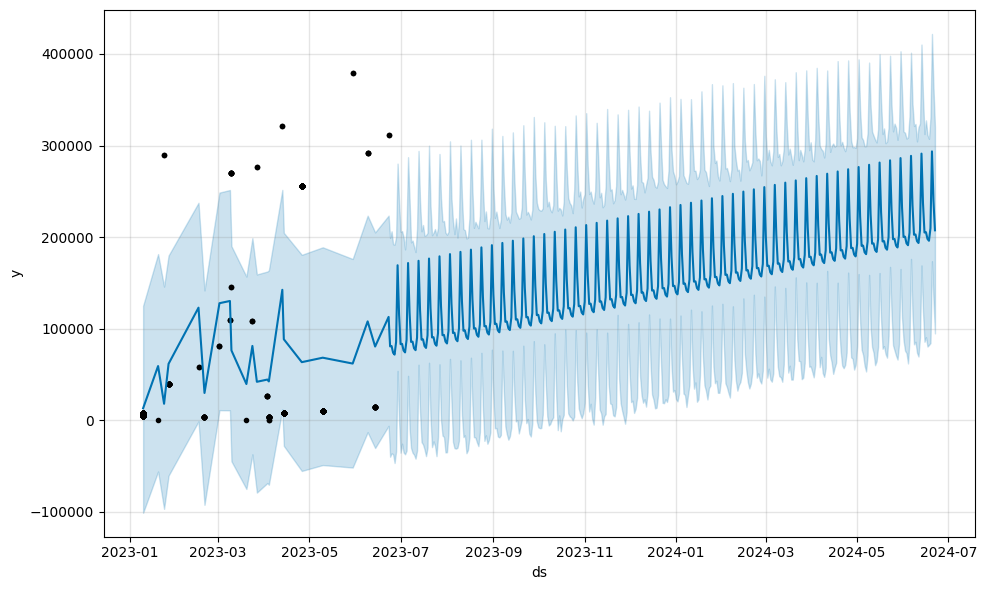

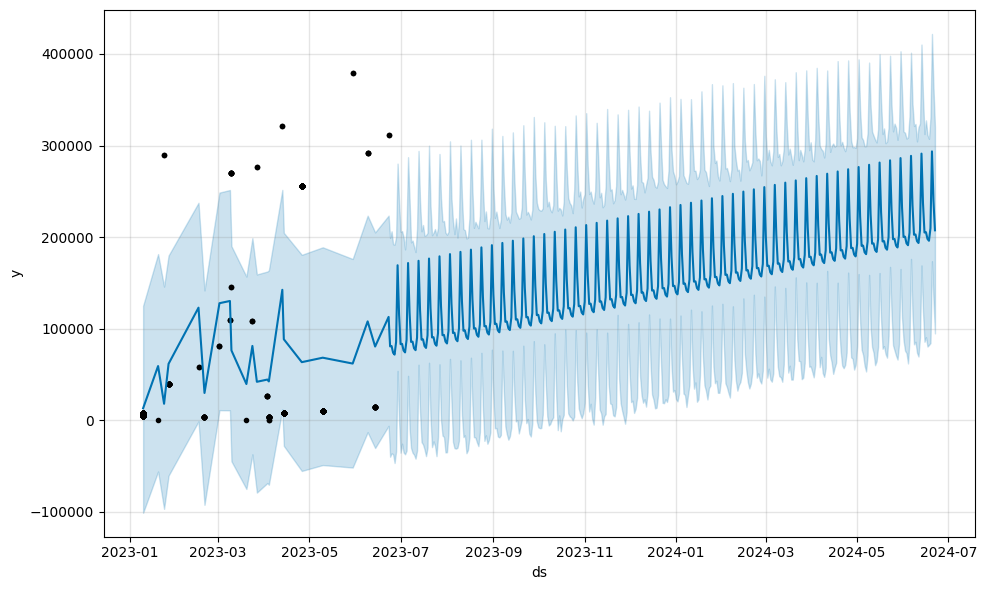

In [23]:
# Make a prediction for the next 10 years
m = Prophet()
m.fit(seine_et_marneDf[lambda x: (x["new_commune"] == 77078)].sort_values(
    "Date mutation")[["Date mutation", "Valeur fonciere"]].rename(columns={"Date mutation": "ds", "Valeur fonciere": "y"}))
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

19:08:08 - cmdstanpy - INFO - Chain [1] start processing
19:08:08 - cmdstanpy - INFO - Chain [1] done processing
/opt/homebrew/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/homebrew/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



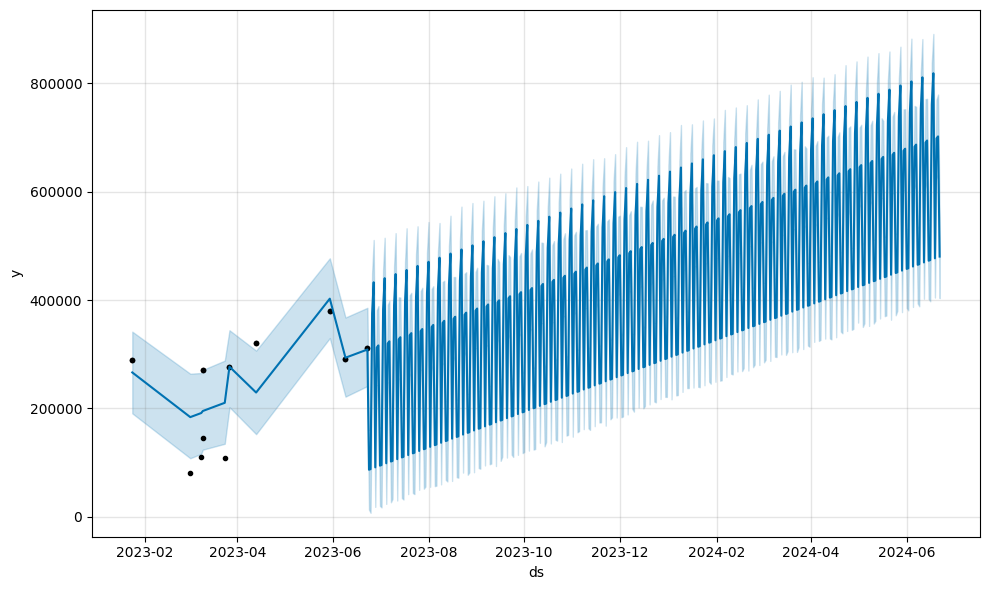

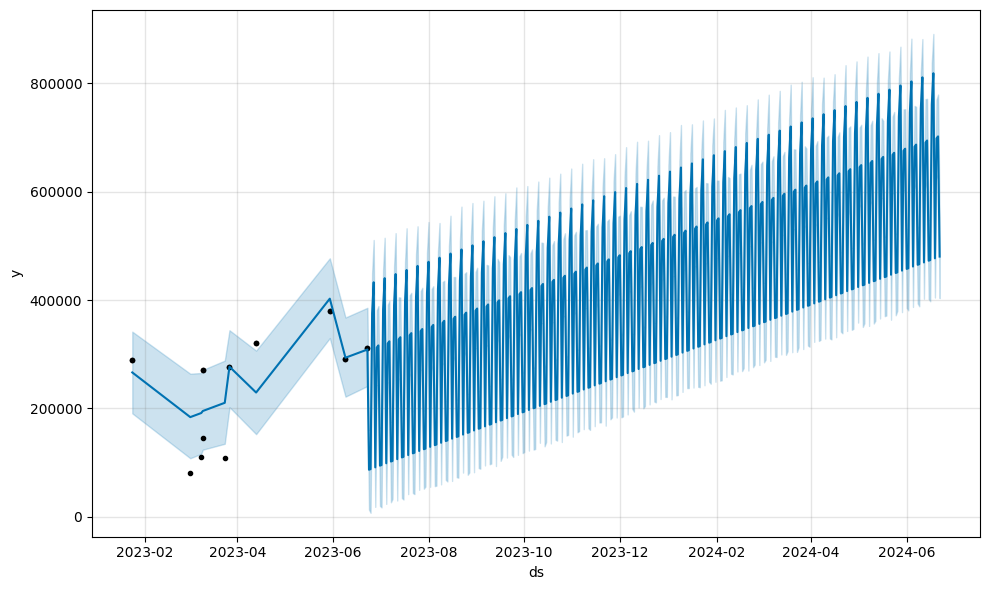

In [24]:
# Make a prediction for the next 10 years
m = Prophet()
m.fit(seine_et_marneDf[lambda x: (x["new_commune"] == 77078) & (x["Type local"] == "Maison")].sort_values(
    "Date mutation")[["Date mutation", "Valeur fonciere"]].rename(columns={"Date mutation": "ds", "Valeur fonciere": "y"}))
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

/opt/homebrew/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



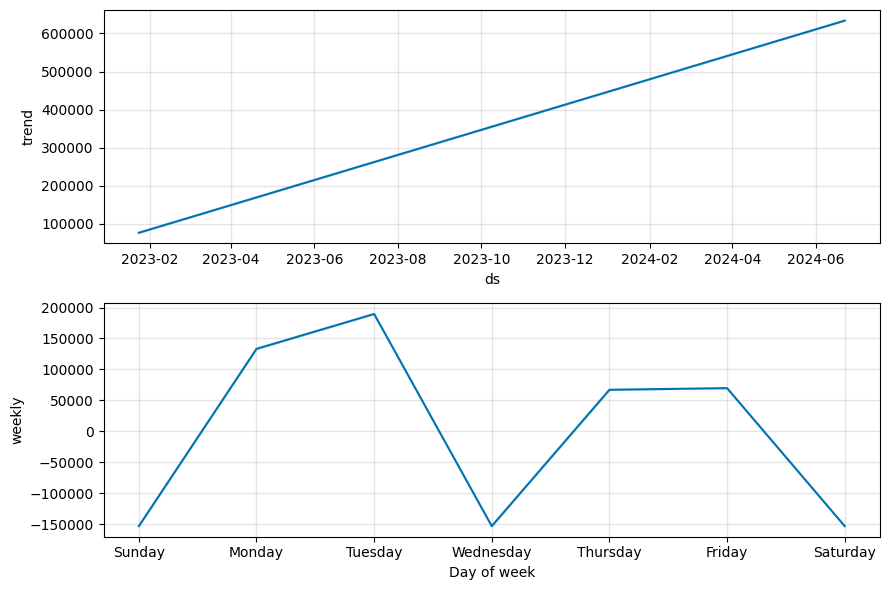

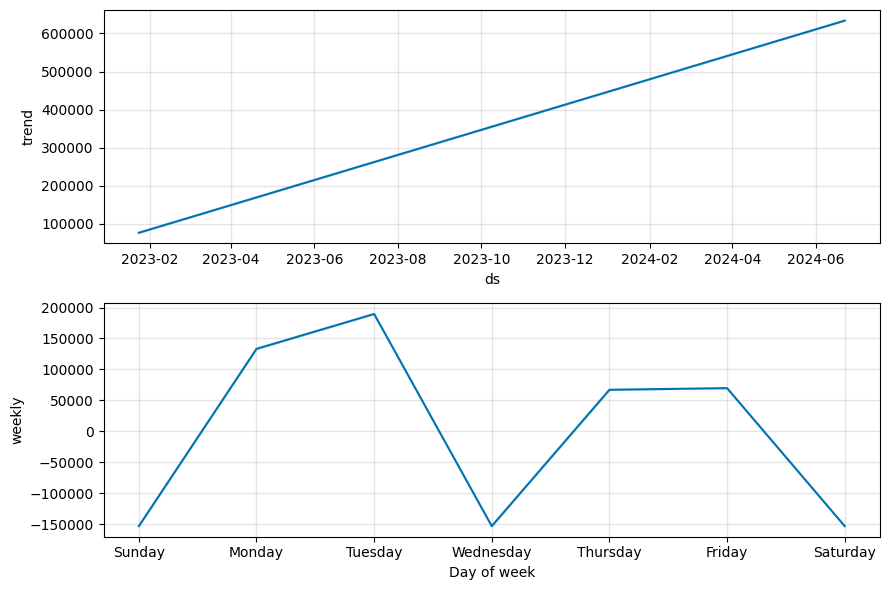

In [25]:
m.plot_components(forecast)

### Modélisation Time Series


In [188]:
# modeling the evolution of the price of property with a sklearn using new_commune, Type local, Surface Totale, Nombre pieces principales, and Date mutation
from sklearn.model_selection import train_test_split

X = seine_et_marneDf[["new_commune", "Type local", "Surface Totale",
                      "Nombre pieces principales", "Date mutation"]]
y = seine_et_marneDf["Valeur fonciere"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,new_commune,Type local,Surface Totale,Nombre pieces principales,Date mutation
1160647,77131,Maison,216.00,3,2023-06-12
1152110,77397,Terrain,395.00,0,2023-03-29
1149412,77318,Terrain,153.00,0,2023-02-17
1143312,77316,Terrain,1023.00,0,2023-06-20
1146433,77083,Terrain,0.00,0,2023-01-31
...,...,...,...,...,...
1154230,77192,Maison,117.00,2,2023-04-18
1155612,77219,Maison,619.00,2,2023-05-04
1139692,77419,Terrain,1145.00,0,2023-04-20
1132536,77285,Dépendance,61.66,0,2023-01-31


In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.preprocessing import RobustScaler

numeric_features = ["Surface Totale", "Nombre pieces principales"]
categorical_features = ["new_commune", "Type local"]
date_features = ["Date mutation"]


numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


def date_convert_to_timestamp(X):
    return X.values.astype(int) // 10 ** 9


date_transformer = FunctionTransformer(date_convert_to_timestamp)

preprocessor = ColumnTransformer(
    transformers=[
                                ('num', numeric_transformer, numeric_features),
                                ('cat', categorical_transformer,
                                 categorical_features),
                                ('date', date_transformer, date_features)], remainder="passthrough")

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))], verbose=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   8.6s


0.8323628183047066

In [191]:
# Make a prediction for the next year for a 100m2 house with 4 rooms in 77078 and plot the evolution of the price of property

forecast = model.predict(
    pd.DataFrame({"new_commune": [77078]*11, "Type local": ["Maison"]*11, "Surface Totale": [100]*11, "Nombre pieces principales": [4]*11, "Date mutation": pd.date_range(start="2023-01-01", periods=11, freq="M")}))
forecast = pd.Series(forecast, index=pd.date_range(
    start="2023-01-01", periods=11, freq="M")
)
px.line(forecast, title="Evolution of the price of property in 77078 for a 100m2 house with 4 rooms")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [202]:
X_train.to_numpy()

array([[77131, 'Maison', 216.0, 3, Timestamp('2023-06-12 00:00:00')],
       [77397, 'Terrain', 395.0, 0, Timestamp('2023-03-29 00:00:00')],
       [77318, 'Terrain', 153.0, 0, Timestamp('2023-02-17 00:00:00')],
       ...,
       [77419, 'Terrain', 1145.0, 0, Timestamp('2023-04-20 00:00:00')],
       [77285, 'Dépendance', 61.66, 0, Timestamp('2023-01-31 00:00:00')],
       [77152, 'Terrain', 7941.0, 0, Timestamp('2023-03-29 00:00:00')]],
      dtype=object)

In [207]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = Pipeline(steps=[('preprocessor', preprocessor),
                        # Make the result into a numpy array
                        ('to_numpy', FunctionTransformer(lambda x: x.toarray())),
                        ('regressor', HistGradientBoostingRegressor(categorical_features=[2, 3], random_state=42))], verbose=True, )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   4.5s


0.717393082485851

In [210]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__learning_rate': [0.1, 0.05, 0.01],
    'regressor__max_iter': [100, 200, 300],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_leaf': [9, 17, 25],
    'regressor__max_leaf_nodes': [5, 10, 15]
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.0s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.0s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.1s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.1s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.1s
[Pipeline] ...

{'regressor__learning_rate': 0.1,
 'regressor__max_depth': 5,
 'regressor__max_iter': 200,
 'regressor__max_leaf_nodes': 15,
 'regressor__min_samples_leaf': 9}

In [222]:
from sklearn.metrics import mean_squared_error

best_hgb_model = grid_search.best_estimator_

mean_squared_error(y_test, best_hgb_model.predict(X_test))

1137674488768.7993

In [262]:
# Make a prediction for the next year for a 100m2 house with 4 rooms in 77078 and plot the evolution of the price of property

fh = pd.date_range(start="2023-01-01", end="2023-12-31", freq="M")

forecast = best_hgb_model.predict(
    pd.DataFrame({"new_commune": [77078]*len(fh), "Type local": ["Maison"]*len(fh), "Surface Totale": [100]*len(fh), "Nombre pieces principales": [4]*len(fh), "Date mutation": fh}))
forecast = pd.Series(forecast, index=fh)
px.line(forecast, title="Evolution of the price of property in 77078 for a 100m2 house with 4 rooms")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [214]:
from sklearn.neural_network import MLPRegressor

neural_network = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', MLPRegressor())])

neural_network.fit(X_train, y_train)
neural_network.score(X_test, y_test)

-0.03957401838321628

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.preprocessing import RobustScaler

numeric_features = ["Surface Totale", "Nombre pieces principales"]
categorical_features = ["new_commune", "Type local"]
date_features = ["Date mutation"]


numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


def date_convert_to_timestamp(X):
    return X.values.astype(int) // 10 ** 9


def preprocessed_todense(X):
    return X.toarray()


date_transformer = FunctionTransformer(date_convert_to_timestamp)

tonumpy_transformer = FunctionTransformer(preprocessed_todense)

preprocessor = ColumnTransformer(
    transformers=[
                                ('num', numeric_transformer, numeric_features),
                                ('cat', categorical_transformer,
                                 categorical_features),
                                ('date', date_transformer, date_features)], remainder="passthrough")

best_hgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('to_numpy', tonumpy_transformer),
                                 ('regressor', HistGradientBoostingRegressor(categorical_features=[2, 3], random_state=42, learning_rate=0.1, max_depth=5, max_iter=200, max_leaf_nodes=15, min_samples_leaf=9))], verbose=True)
best_hgb_model.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s
[Pipeline] .......... (step 2 of 3) Processing to_numpy, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   3.8s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Surface Totale',
                                                   'Nombre pieces '
                                                   'principales']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['new_commune',
                                                   'Type local']),
                                                 ('date',
                                                  FunctionTransformer(func=<function date_convert_to_timestamp at 0x280e11f30>),
                                                  ['Date mutation'])])),
                ('to_numpy',
                 FunctionTransformer(func=<function preprocessed_todense at 0x280e113f0>)),
                ('regressor',
                 HistGradientBoostingRegressor(categorical_features=[2, 3],
                                               max_depth=5, max_iter=200,
                                               max_leaf_nodes=15,
                                               min_samples_leaf=9,
                                               random_state=42))],
         verbose=True)

In [237]:
import pickle

pickle.dump(best_hgb_model, open("model.pkl", "wb"))

In [244]:
from sklearn.gaussian_process import GaussianProcessRegressor

gaussian_process = Pipeline(steps=[('preprocessor', preprocessor),
                                   ("to_numpy", tonumpy_transformer),
                                   ('regressor', GaussianProcessRegressor(random_state=42))])
gaussian_process.fit(X_train, y_train)
gaussian_process.score(X_test, y_test)

-57.35757718696108

In [245]:
mean_squared_error(y_test, gaussian_process.predict(X_test))

278313784907425.9

In [256]:
# Make a prediction for the next year for a 100m2 house with 4 rooms in 77078 and plot the evolution of the price of property

fh = pd.date_range(start="2023-01-01", end="2024-01-01", freq="M")

forecast = gaussian_process.predict(
    pd.DataFrame({"new_commune": [77078]*len(fh), "Type local": ["Maison"]*len(fh), "Surface Totale": [100]*len(fh), "Nombre pieces principales": [4]*len(fh), "Date mutation": fh}))
forecast = pd.Series(forecast, index=fh)
px.line(forecast, title="Evolution of the price of property in 77078 for a 100m2 house with 4 rooms")

/opt/homebrew/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

